<a href="https://colab.research.google.com/github/jcallaghan2020/Deep-learning/blob/main/a4_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

John Callaghan Z23482418

https://colab.research.google.com/drive/14DlelfUtXLxrrYRjBYcHcUBoyfFJXjh2?usp=sharing



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork(object):

  def __init__(self, l_rate1):
    np.random.seed(1)
    self.weight_matrix = 2 * np.random.random((3, 1)) - 1
    self.l_rate = l_rate1
    self.history = []

  def hard_limiter(self, x):
    outs = np.zeros(x.shape)
    outs[x>0] = 1
    return outs

  def tanh(self, x):
    return np.tanh(x)

  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def forward_propagation(self, inputs):
    outs = np.dot(inputs, self.weight_matrix)
    #outs = self.sigmoid(outs) 
    return outs            

  def train(self, train_inputs, train_outputs, num_train_iterations = 10):
    for iteration in range(num_train_iterations):
      for i in range(train_inputs.shape[0]):
        self.history.append(self.weight_matrix)
        pred_i = self.pred(train_inputs[i,:])
        if pred_i != train_outputs[i]:
          output = self.forward_propagation(train_inputs[i,:])
          error = train_outputs[i] - output
          adjustment = self.l_rate * error * train_inputs[i]
          self.weight_matrix[:,0] += adjustment
          print("iteration #" + str(iteration))
          print(str(self.history[-3:]))
          plot_fun_thr(train_inputs[:,1:3], train_outputs, self.weight_matrix[:,0], classes)

  def train_GDL(self, train_inputs, train_outputs, num_train_iterations=10, lr=1):
    N = train_inputs.shape[0]
    self.l_rate = lr
    cost_func = np.array([])
    for iteration in range(num_train_iterations):
      self.history.append(self.weight_matrix)
      outputs = self.forward_propagation(train_inputs)
      error = train_outputs - outputs
      adjustment = (self.l_rate/N) * np.sum(np.multiply(error, train_inputs), axis=0) 

      cost_func = np.append(cost_func, (1/2 * N) * np.sum(np.power(error, 2)))
      if iteration%5 == 0:

        self.weight_matrix[:,0] += adjustment
        print("iteration #" + str(iteration))
        print("current weights:", str(self.history[-1:]))
        plot_fun_thr(train_inputs[:,1:3], train_outputs[:,0], self.weight_matrix[:,0], classes)

    plot_cost_func(cost_func,num_train_iterations)


  def pred(self, inputs):
      prob = self.forward_propagation(inputs)
      preds = np.int8(prob > 0.5)
      return preds

def plot_cost_func(j, iterations):
  x = np.arange(iterations, dtype=int)
  y = j
  plt.plot(x,y)
  plt.axis([-1,x.shape[0]+1, -1, np.max(y)+1])
  plt.title('learning curve')
  plt.xlabel('x: iteration number')
  plt.ylabel('y: j(θ)')
  plt.show()
  
def plot_fun(features,  labels, classes):
  plt.plot(features[labels[:] == classes[0],0], features[labels[:] == classes[0],1], 'rs', 
          features[labels[:] == classes[1],0], features[labels[:] == classes[1],1], 'g^')
  
  plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('x: feature 2')
  plt.legend(['Class '+str(classes[0]), 'Class ' + str(classes[1])])
  plt.show()

def plot_fun_thr(features, labels, thre_params, classes):
  plt.plot(features[labels[:] == classes[0],0], features[labels[:] == classes[0],1], 'rs', 
          features[labels[:] == classes[1],0], features[labels[:] == classes[1],1], 'g^')
  
  plt.axis([-3,3,-3,3])
  x1 = np.linspace(-1, 2, 50)
  x2 = -(thre_params[1] * x1 + thre_params[0]) / thre_params[2]
  plt.plot(x1,x2,'-r')
  plt.xlabel('x: feature 1')
  plt.ylabel('x: feature 2')
  plt.legend(['Class '+str(classes[0]), 'Class ' + str(classes[1])])
  plt.show()






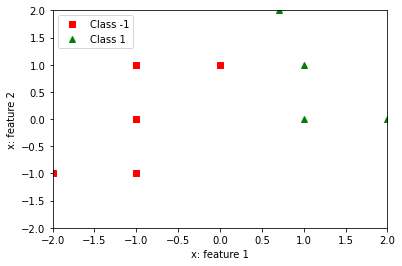

In [ ]:
features = np.array([[1,1], [1,0], [0,1], [-1,-1], [0.5, 3], [0.7,2], [-1,0], [-1,1], [2,0], [-2,-1]])
labels = np.array([1,1,-1,-1,1,1,-1,-1,1,-1])
classes = [-1,1]

plot_fun(features, labels, classes)

In [ ]:
bias = np.ones((features.shape[0], 1))
features = np.append(bias, features, axis=1)
print(features)
print(features.shape)

[[ 1.   1.   1. ]
 [ 1.   1.   0. ]
 [ 1.   0.   1. ]
 [ 1.  -1.  -1. ]
 [ 1.   0.5  3. ]
 [ 1.   0.7  2. ]
 [ 1.  -1.   0. ]
 [ 1.  -1.   1. ]
 [ 1.   2.   0. ]
 [ 1.  -2.  -1. ]]
(10, 3)


learning rate is 1
random weights at start: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
iteration #0
current weights: [array([[0.59104977],
       [1.44838144],
       [1.23940769]])]


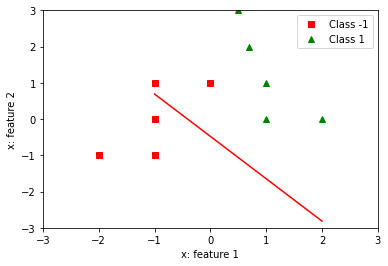

iteration #5
current weights: [array([[-0.77261224],
       [-0.26476619],
       [-1.60070106]])]


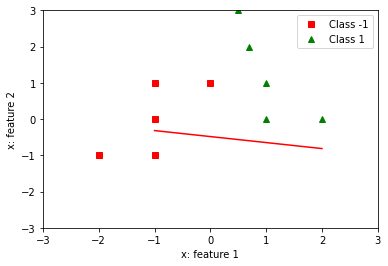

iteration #10
current weights: [array([[0.96571596],
       [2.07888843],
       [2.50034025]])]


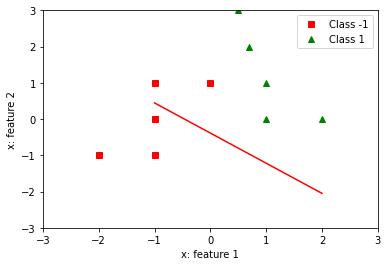

iteration #15
current weights: [array([[-1.54178192],
       [-1.25201934],
       [-3.20624595]])]


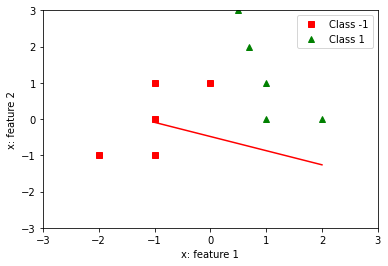

iteration #20
current weights: [array([[1.94878796],
       [3.41077598],
       [4.82875732]])]


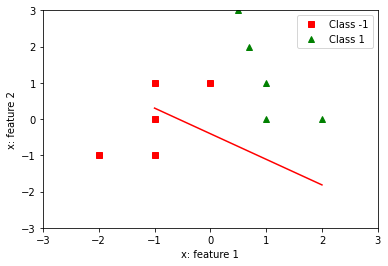

iteration #25
current weights: [array([[-2.96546991],
       [-3.1435728 ],
       [-6.44463646]])]


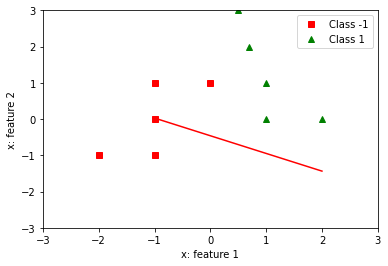

iteration #30
current weights: [array([[3.92965333],
       [6.05734114],
       [9.38969906]])]


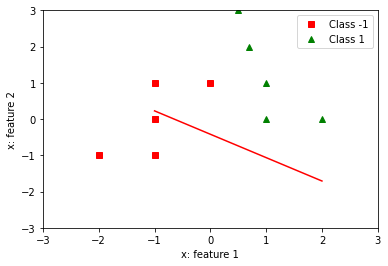

iteration #35
current weights: [array([[ -5.75496626],
       [ -6.8639611 ],
       [-12.84338252]])]


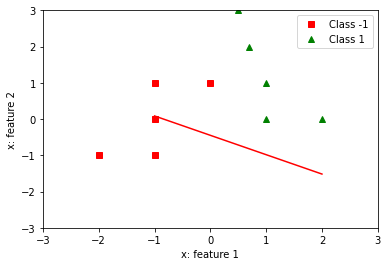

iteration #40
current weights: [array([[ 7.84330873],
       [11.27981646],
       [18.37742282]])]


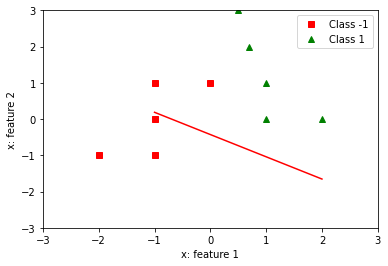

iteration #45
current weights: [array([[-11.25205002],
       [-14.198197  ],
       [-25.46301521]])]


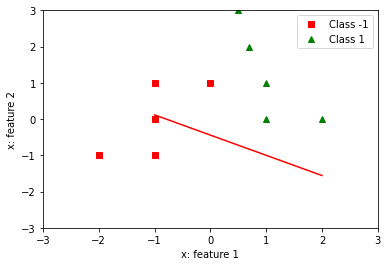

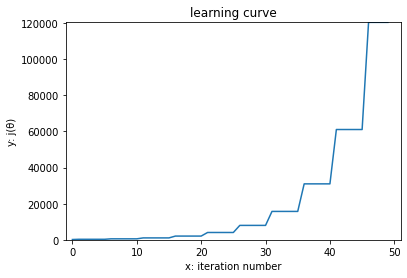

new weights: 
[[-11.25205002]
 [-14.198197  ]
 [-25.46301521]]
testing with data points: 
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
testing on new examples: 
[0]
learning rate is 0.5
random weights at start: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
iteration #0
current weights: [array([[0.21254689],
       [0.94451521],
       [0.11981822]])]


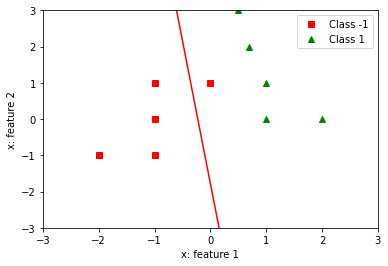

iteration #5
current weights: [array([[ 0.06088283],
       [ 0.76816142],
       [-0.03041423]])]


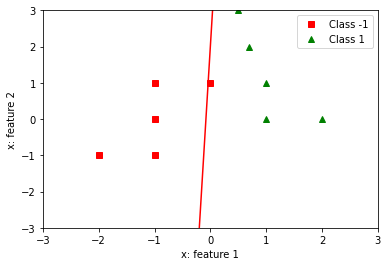

iteration #10
current weights: [array([[0.03188407],
       [0.75879789],
       [0.05208611]])]


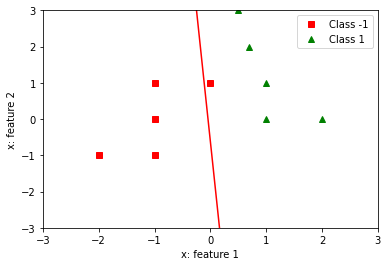

iteration #15
current weights: [array([[-0.00727178],
       [ 0.7318195 ],
       [ 0.07179801]])]


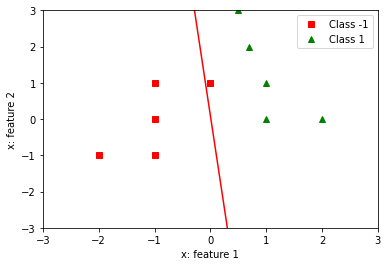

iteration #20
current weights: [array([[-0.03249349],
       [ 0.71795181],
       [ 0.09347458]])]


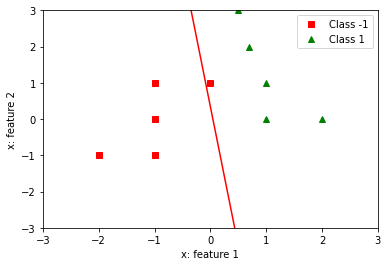

iteration #25
current weights: [array([[-0.05146864],
       [ 0.70746885],
       [ 0.10729972]])]


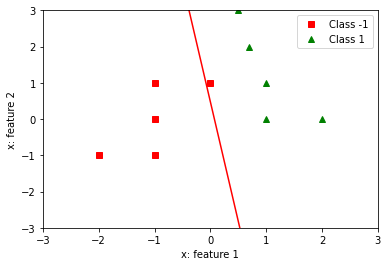

iteration #30
current weights: [array([[-0.06499892],
       [ 0.70029902],
       [ 0.11746725]])]


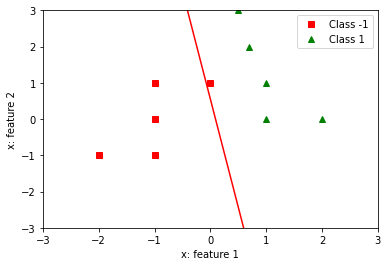

iteration #35
current weights: [array([[-0.07474263],
       [ 0.69519074],
       [ 0.12465819]])]


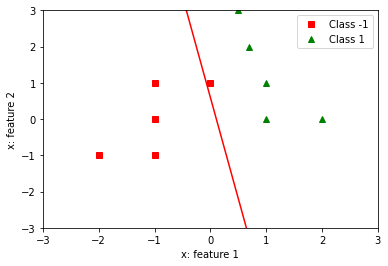

iteration #40
current weights: [array([[-0.08172068],
       [ 0.69156796],
       [ 0.12980734]])]


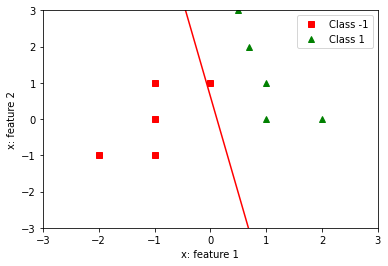

iteration #45
current weights: [array([[-0.08671822],
       [ 0.68898481],
       [ 0.13348439]])]


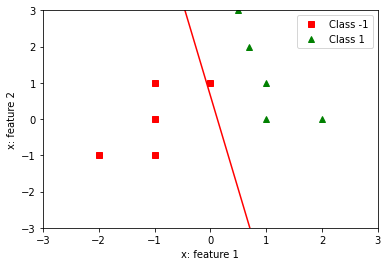

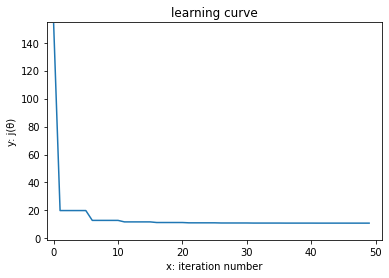

new weights: 
[[-0.08671822]
 [ 0.68898481]
 [ 0.13348439]]
testing with data points: 
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
testing on new examples: 
[1]
learning rate is 0.05
random weights at start: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
iteration #0
current weights: [array([[-0.1281057 ],
       [ 0.49103561],
       [-0.8878123 ]])]


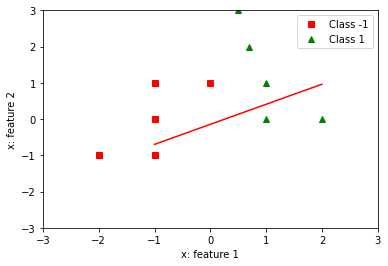

iteration #5
current weights: [array([[-0.09555708],
       [ 0.53462003],
       [-0.78855158]])]


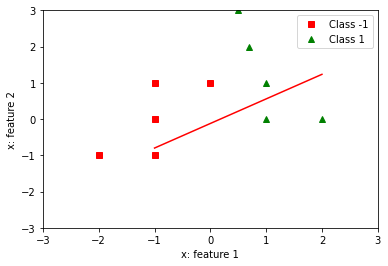

iteration #10
current weights: [array([[-0.0676573 ],
       [ 0.57224946],
       [-0.70048651]])]


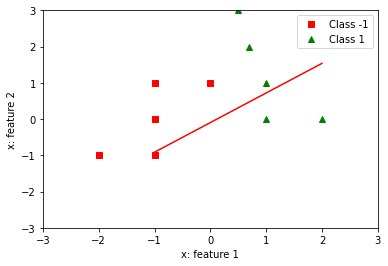

iteration #15
current weights: [array([[-0.04383209],
       [ 0.60466794],
       [-0.62229437]])]


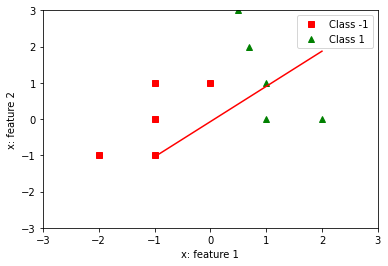

iteration #20
current weights: [array([[-0.02357632],
       [ 0.63252876],
       [-0.55281061]])]


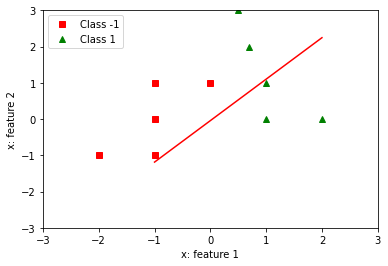

iteration #25
current weights: [array([[-0.00644572],
       [ 0.65640553],
       [-0.49100997]])]


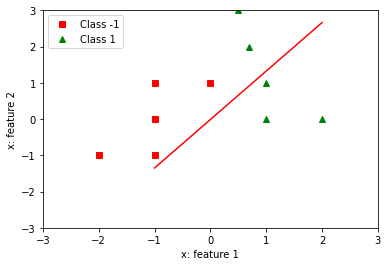

iteration #30
current weights: [array([[ 0.00795046],
       [ 0.67680171],
       [-0.43598966]])]


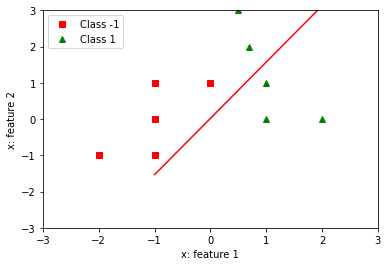

iteration #35
current weights: [array([[ 0.01995583],
       [ 0.69415917],
       [-0.38695476]])]


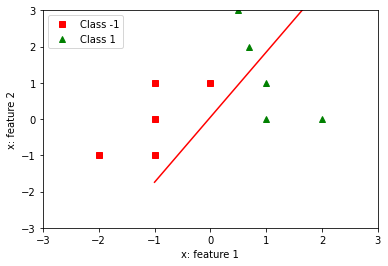

iteration #40
current weights: [array([[ 0.02987252],
       [ 0.70886565],
       [-0.3432052 ]])]


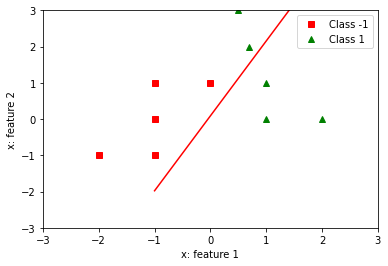

iteration #45
current weights: [array([[ 0.03796618],
       [ 0.72126126],
       [-0.30412444]])]


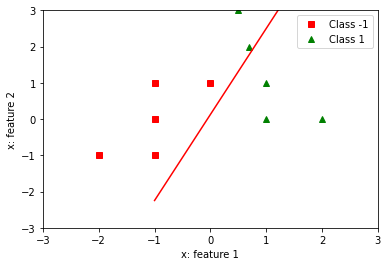

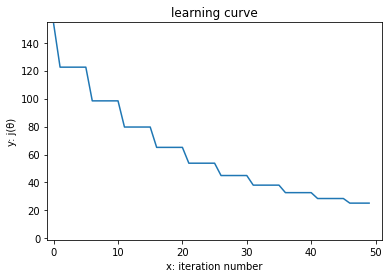

new weights: 
[[ 0.03796618]
 [ 0.72126126]
 [-0.30412444]]
testing with data points: 
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
testing on new examples: 
[0]


In [ ]:
neural_network = NeuralNetwork(1)
print("learning rate is 1")
print("random weights at start: ")
print(neural_network.weight_matrix)
neural_network.train_GDL(features, np.expand_dims(labels, axis=1), 50, 1)

print('new weights: ')
print(neural_network.weight_matrix)

print('testing with data points: ')
print(neural_network.pred(features))

print('testing on new examples: ')
print(neural_network.pred(np.array([1,1,1])))


neural_network2 = NeuralNetwork(0.5)
print("learning rate is 0.5")
print("random weights at start: ")
print(neural_network2.weight_matrix)
neural_network2.train_GDL(features, np.expand_dims(labels, axis=1), 50, 0.5)

print('new weights: ')
print(neural_network2.weight_matrix)

print('testing with data points: ')
print(neural_network2.pred(features))

print('testing on new examples: ')
print(neural_network2.pred(np.array([1,1,1])))


neural_network3 = NeuralNetwork(0.05)
print("learning rate is 0.05")
print("random weights at start: ")
print(neural_network3.weight_matrix)
neural_network3.train_GDL(features, np.expand_dims(labels, axis=1), 50, 0.05)

print('new weights: ')
print(neural_network3.weight_matrix)

print('testing with data points: ')
print(neural_network3.pred(features))

print('testing on new examples: ')
print(neural_network3.pred(np.array([1,1,1])))

fig, (ax1, ax2, ax3) = plt.subplots(1, 2, 3)
fig.suptitle('cost functions for 1, 0.5, 0.05')
ax1.plot(x, y)
ax2.plot(x, -y)
ax3.plot()

In [ ]:
print("Learning rate of 1 is too high. Learning rate of 0.5 is best.")

Learning rate of 1 is too high. Learning rate of 0.5 is best.
